In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
url = 'https://interactive.guim.co.uk/docsdata/1q5gdePANXci8enuiS4oHUJxcxC13d6bjMRSicakychE.json'
res = requests.get(url)
updates = res.json()['sheets']['updates']

,State,Cumulative case count,Date
382,WA,535.0,2020-04-16
374,WA,532.0,2020-04-15
367,WA,527.0,2020-04-14
359,WA,523.0,2020-04-13
351,WA,517.0,2020-04-12


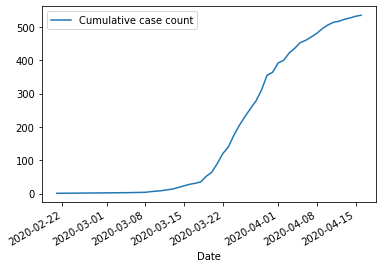

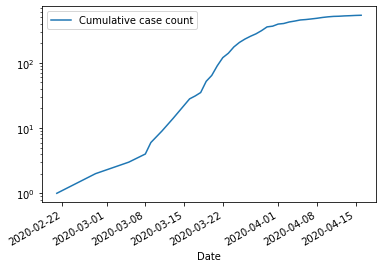

In [7]:
df=pd.DataFrame(updates)

df = df[['State','Cumulative case count','Date']]
df['Cumulative case count'] = pd.to_numeric(df['Cumulative case count'])
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

wa_df = df.loc[df['State'] == 'WA']
wa_df = wa_df.dropna()

wa_df.plot(x ='Date', y='Cumulative case count', kind = 'line')
wa_df.plot(x ='Date', y='Cumulative case count', kind = 'line', logy=True)
wa_df.sort_values(by=['Date'], ascending=False).head()

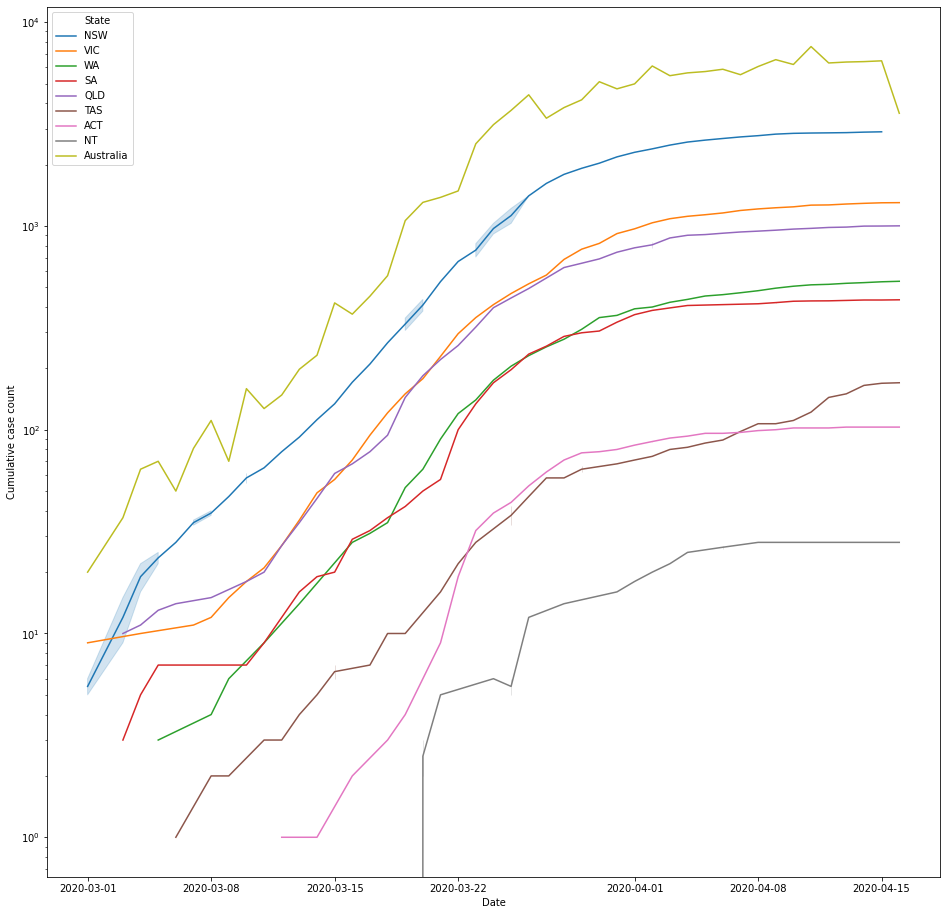

In [8]:
df = df[(df.Date > '2020-02-29') ]
all_df = df.groupby(['Date']).sum()

all_df['State'] = 'Australia'
all_df['Date'] = all_df.index

all_df = pd.concat([df, all_df])
fig2, ax2 = plt.subplots(figsize=(16, 16))
# Set the scale of the x-and y-axes
ax2.set(yscale="log")

sns.lineplot(data=all_df, x ='Date', y='Cumulative case count',  hue='State' )

# New Section